In [3]:
pip install requests


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 64 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 18.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install rasterio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 18.8 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 9.7 MB/s  eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

# Your OpenTopography API key
OPENTOPO_API_KEY = "f95f74790401d94ee1989cd4cffea1d7"

# Define the bounding box for the area of interest
min_lon, min_lat = -107.25, 38.5
max_lon, max_lat = -106.5, 39.25

# OpenTopography API URL
url = "https://portal.opentopography.org/API/globaldem"

# Parameters for the API request
params = {
    'demtype': 'SRTMGL1',  # You can choose other DEM types like 'SRTMGL3', 'AW3D30', etc.
    'south': min_lat,
    'north': max_lat,
    'west': min_lon,
    'east': max_lon,
    'outputFormat': 'GTiff',
    'API_Key': OPENTOPO_API_KEY
}

# Make the API request
response = requests.get(url, params=params)

# Save the DEM file
dem_path = 'dem.tif'
with open(dem_path, 'wb') as f:
    f.write(response.content)

dem_path

with rasterio.open(dem_path) as src:
    # Calculate the window to read based on the desired coordinates
    window = rasterio.windows.from_bounds(min_lon, min_lat, max_lon, max_lat, transform=src.transform)
    dem = src.read(1, window=window)
    transform = src.window_transform(window)

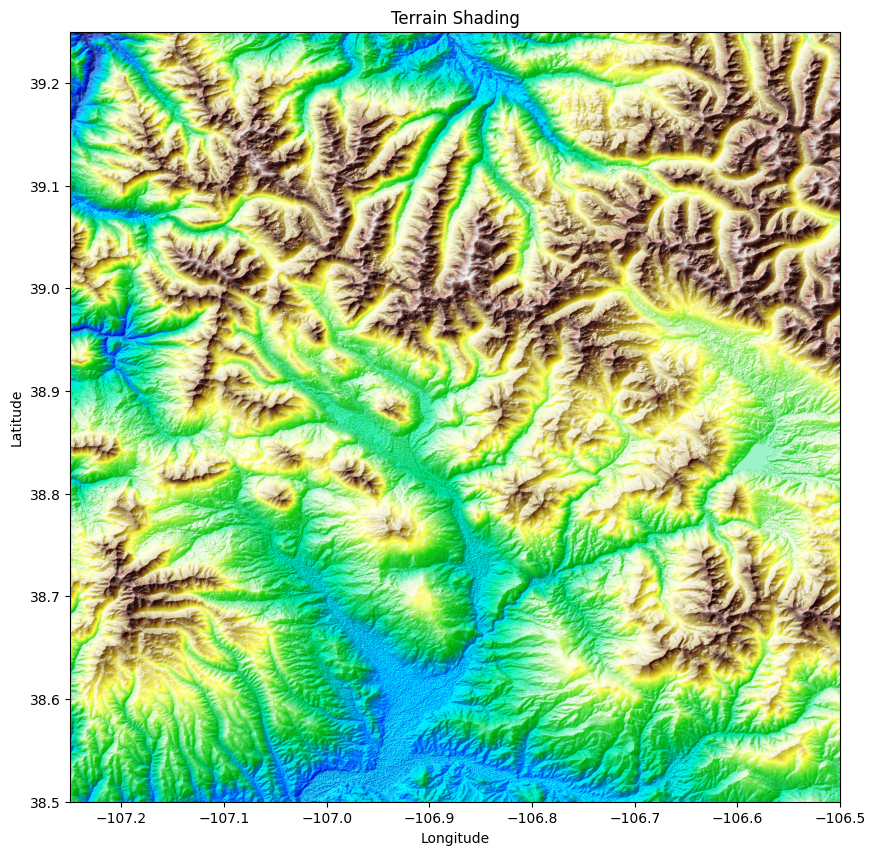

In [2]:
# Open the DEM file
with rasterio.open(dem_path) as src:
    # Calculate the window to read based on the desired coordinates
    window = rasterio.windows.from_bounds(min_lon, min_lat, max_lon, max_lat, transform=src.transform)
    dem = src.read(1, window=window)
    transform = src.window_transform(window)

# Create a light source object
ls = LightSource(azdeg=315, altdeg=45)

# Shade the DEM data
shaded_dem = ls.shade(dem, cmap=plt.cm.terrain, blend_mode='overlay')

# Plot the shaded DEM
plt.figure(figsize=(10, 10))
plt.imshow(shaded_dem, extent=(transform[2], transform[2] + transform[0] * dem.shape[1], transform[5] + transform[4] * dem.shape[0], transform[5]))
plt.title('Terrain Shading')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()